In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('SBIN.NS.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,18.691147,18.978922,18.540184,18.823240,12.651093,43733533.0
1,1996-01-02,18.894005,18.964767,17.738192,18.224106,12.248409,56167280.0
2,1996-01-03,18.327892,18.568489,17.643839,17.738192,11.921828,68296318.0
3,1996-01-04,17.502312,17.832542,17.223972,17.676863,11.880607,86073880.0
4,1996-01-05,17.738192,17.785366,17.459852,17.577793,11.814024,76613039.0


In [4]:
df.iloc[:, 4:5]

,Close
0,18.823240
1,18.224106
2,17.738192
3,17.676863
4,17.577793
...,...
6768,599.049988
6769,602.700012
6770,598.099976
6771,599.099976


In [5]:
import datetime

In [6]:
print(datetime.datetime.now().date())

2022-12-09


In [9]:
df.iloc[-61:]

,Date,Open,High,Low,Close,Adj Close,Volume
6712,2022-08-25,521.950012,528.299988,518.500000,520.400024,520.400024,15473450.0
6713,2022-08-26,523.799988,529.500000,522.200012,523.799988,523.799988,12855886.0
6714,2022-08-29,511.299988,517.000000,508.750000,514.849976,514.849976,9421339.0
6715,2022-08-30,518.200012,532.500000,517.950012,531.250000,531.250000,14835308.0
6716,2022-09-01,522.250000,540.900024,522.250000,533.299988,533.299988,16670228.0
...,...,...,...,...,...,...,...
6768,2022-11-17,599.099976,602.750000,596.150024,599.049988,599.049988,8167131.0
6769,2022-11-18,601.000000,605.750000,597.150024,602.700012,602.700012,12933675.0
6770,2022-11-21,602.099976,602.099976,595.349976,598.099976,598.099976,7412419.0
6771,2022-11-22,598.150024,600.700012,596.150024,599.099976,599.099976,8048595.0


In [1]:
from stock_prediction import StockPrediction

In [5]:
df = df.dropna()

In [9]:
df_test = df.iloc[:-10]

In [11]:
from tensorflow.keras.models import load_model
model = load_model('test_model.h5')

In [12]:
sp = StockPrediction(model, df_test)

In [13]:
weekly_result = sp.continuous_weekly_prediction()

2022-12-10 19:59:09.831171: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


1/1 [==============================] - 0s 33ms/step


In [17]:
import numpy as np

In [23]:
weekly_result = np.array(weekly_result).flatten().reshape(5,1)

In [25]:
weekly_result

array([[609.9112 ],
       [611.0103 ],
       [616.8869 ],
       [621.4594 ],
       [624.32837]], dtype=float32)

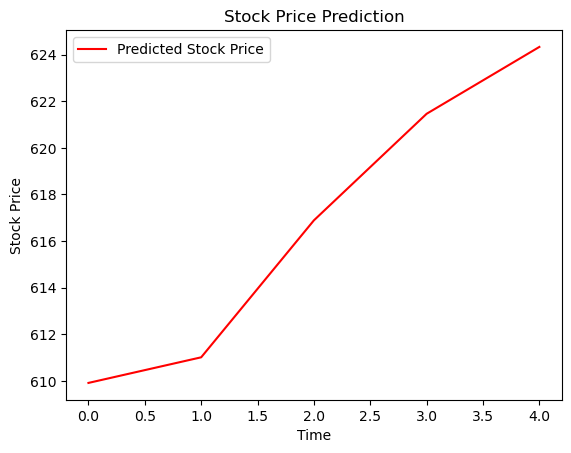

In [26]:
sp.weekly_prediction_graph(weekly_result)

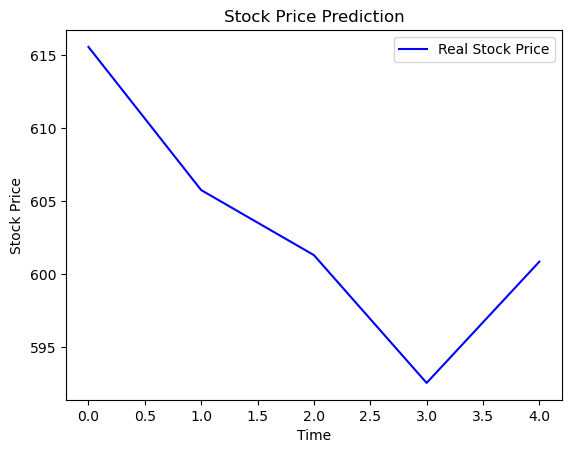

In [44]:
sp.real_data_graph(df.iloc[-11:-6, 4:5].values)

In [34]:
sp.run_daily().flatten()

1/1 [==============================] - 0s 67ms/step


array([609.9112], dtype=float32)

In [42]:
df.iloc[-10]

Date         2022-11-10
Open         613.099976
High         615.099976
Low          602.200012
Close            605.75
Adj Close        605.75
Volume       11618405.0
Name: 6763, dtype: object

In [45]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,18.691147,18.978922,18.540184,18.823240,12.651093,43733533.0
1,1996-01-02,18.894005,18.964767,17.738192,18.224106,12.248409,56167280.0
2,1996-01-03,18.327892,18.568489,17.643839,17.738192,11.921828,68296318.0
3,1996-01-04,17.502312,17.832542,17.223972,17.676863,11.880607,86073880.0
4,1996-01-05,17.738192,17.785366,17.459852,17.577793,11.814024,76613039.0
...,...,...,...,...,...,...,...
6768,2022-11-17,599.099976,602.750000,596.150024,599.049988,599.049988,8167131.0
6769,2022-11-18,601.000000,605.750000,597.150024,602.700012,602.700012,12933675.0
6770,2022-11-21,602.099976,602.099976,595.349976,598.099976,598.099976,7412419.0
6771,2022-11-22,598.150024,600.700012,596.150024,599.099976,599.099976,8048595.0


In [46]:
df['Date'] = pd.to_datetime(df['Date'])

In [49]:
from modelTesting import PmTesting
import datetime

In [50]:
df_testmodel = df[df['Date'] > datetime.datetime(2022, 1, 1)]

In [52]:
len(df_testmodel)

221

In [54]:
pmt = PmTesting(model,df_testmodel)

In [55]:
p_price = pmt.test_model()

6/6 [==============================] - 0s 39ms/step


In [57]:
p_price.shape

(161, 1)

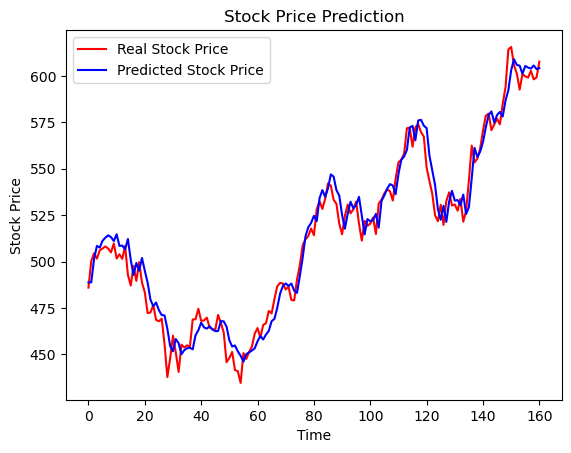

In [58]:
pmt.real_v_predicted_graph(p_price)